# Comparison with Observations: 
## Mean Absolute Percent Error and Normilized Forecast Metric Calculations

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of histograms](#2-comparison-of-histograms)

3. [Seasonal and Monthly 95 percentage level](#3-seasonal-and-monthly-95-percentage-level)

4. [Mean comparison](#4-mean-comparison)

5. [Bias of a different models]()

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

In [3]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)

In [42]:
path_to_ifs='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ifs_tco1279_orca025/'
DJF_hist_ifs, MAM_hist_ifs, JJA_hist_ifs, SON_hist_ifs = diag.merge_list_of_histograms(path_to_histograms = path_to_ifs, multi = None, seasons = True, all = False)

In [5]:
path_to_mswep='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/mswep_past_3hourly/'
DJF_hist, MAM_hist, JJA_hist, SON_hist = diag.merge_list_of_histograms(path_to_histograms = path_to_mswep, multi = None, seasons = True, all = False)

In [19]:
one_hist = diag.merge_list_of_histograms(path_to_histograms = path_to_mswep, multi = 1, seasons = False, all = False)

In [23]:
one_hist.counts.values[0:-1:2] 

array([67483789., 19648216., 12694982.,  9877016.,  9211763.,  6323521.,
        5105420.,  4132446.,  3854697.,  2697404.])

In [30]:
DJF_hist_reduced = DJF_hist.isel(center_of_bin=slice(0, -1, 2))
MAM_hist_reduced = MAM_hist.isel(center_of_bin=slice(0, -1, 2))
JJA_hist_reduced = JJA_hist.isel(center_of_bin=slice(0, -1, 2))
SON_hist_reduced = SON_hist.isel(center_of_bin=slice(0, -1, 2))

In [38]:
#path_test ='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/trop_rainfall_ifs_tco1279_orca025_3hourly_2D_1h_native_r010_3h_2022-01-01T00_2022-02-28T21_histogram.nc'
path_test='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ifs_tco1279_orca025/trop_rainfall_ifs_tco1279_orca025_3hourly_2D_1h_native_r010_2020-01-20T00_2020-02-19T21_histogram.nc'
diag.open_dataset(path_to_netcdf = path_test).counts.values

array([1.26429884e+08, 1.45395680e+07, 7.19463900e+06, 4.54476200e+06,
       3.29967500e+06, 2.59179300e+06, 2.14389700e+06, 1.82970100e+06,
       1.59875100e+06, 1.41370600e+06, 1.26309800e+06, 1.13443400e+06,
       1.02057100e+06, 9.23258000e+05, 8.32791000e+05, 7.50022000e+05,
       6.76776000e+05, 6.09849000e+05, 5.47903000e+05, 4.95376000e+05])

In [ ]:
path_test ='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/trop_rainfall_ifs_tco1279_orca025_3hourly_2D_1h_native_r010_3h_2022-01-01T00_2022-02-28T21_histogram.nc'
diag.open_dataset(path_to_netcdf = path_test).counts.values

In [ ]:
add = diag.histogram_plot(DJF_hist_ifs,   legend='DJF, ifs', new_unit='mm/day')
add = diag.histogram_plot(DJF_hist_reduced,  add=add, legend='DJF, mswep', new_unit='mm/day', ls='--')

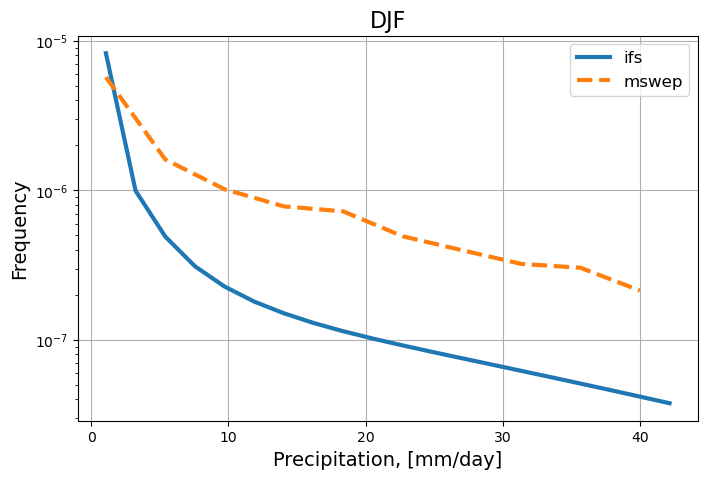

In [48]:
add = diag.histogram_plot(DJF_hist_ifs,   pdf=False, frequency=True, legend='ifs', new_unit='mm/day')
add = diag.histogram_plot(DJF_hist_reduced,  pdf=False, frequency=True, add=add, legend='mswep', new_unit='mm/day', ls='--',
                          plot_title='DJF')

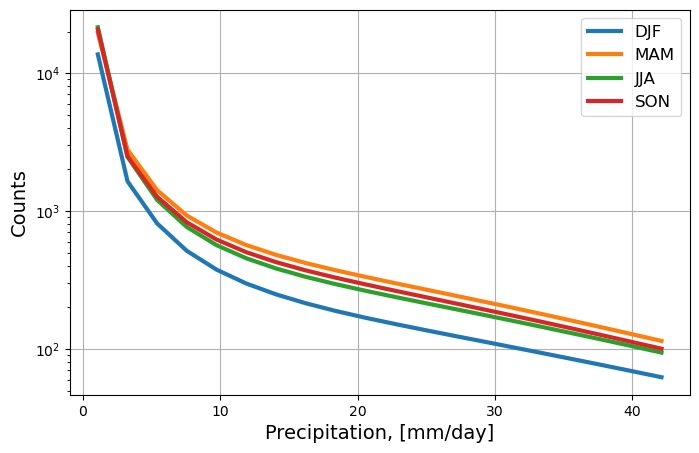

In [43]:
add = diag.histogram_plot(DJF_hist_ifs, pdf=False,  legend='DJF', new_unit='mm/day', )

add = diag.histogram_plot(MAM_hist_ifs, pdf=False,  legend='MAM', new_unit='mm/day', add=add)
add = diag.histogram_plot(JJA_hist_ifs, pdf=False,  legend='JJA', new_unit='mm/day', add=add, color='tab:green')
add = diag.histogram_plot(SON_hist_ifs, pdf=False,  legend='SON', new_unit='mm/day', add=add, color='tab:red')

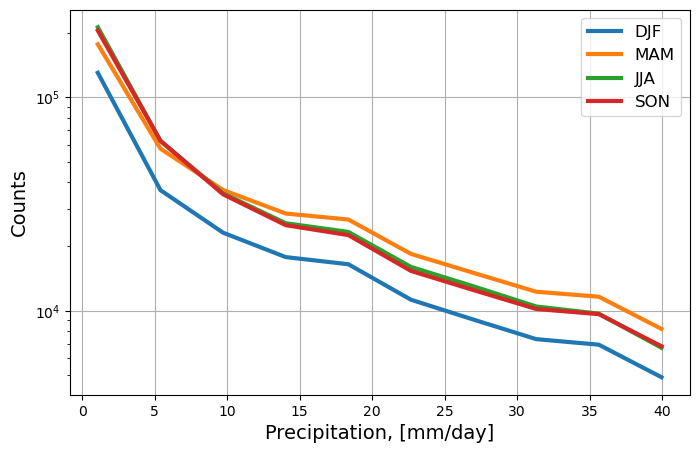

In [39]:
add = diag.histogram_plot(DJF_hist_reduced, pdf=False,  legend='DJF', new_unit='mm/day', )
add = diag.histogram_plot(MAM_hist_reduced, pdf=False,  legend='MAM', new_unit='mm/day', add=add)
add = diag.histogram_plot(JJA_hist_reduced, pdf=False,  legend='JJA', new_unit='mm/day', add=add, color='tab:green')
add = diag.histogram_plot(SON_hist_reduced, pdf=False,  legend='SON', new_unit='mm/day', add=add, color='tab:red')

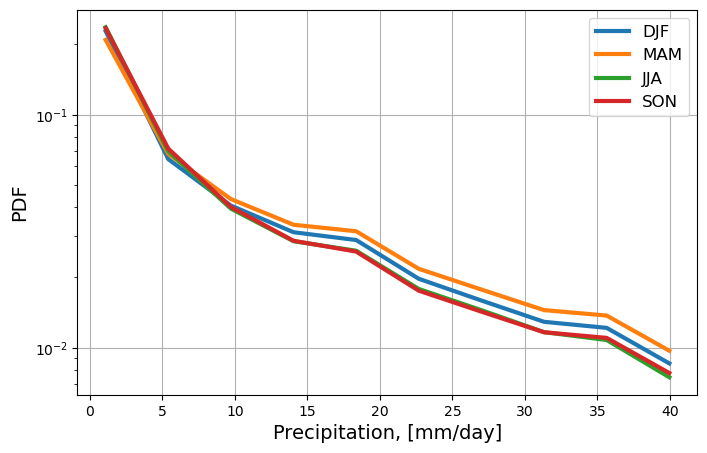

In [33]:
add = diag.histogram_plot(DJF_hist_reduced, pdf=True,  legend='DJF', new_unit='mm/day', )
add = diag.histogram_plot(MAM_hist_reduced, pdf=True,  legend='MAM', new_unit='mm/day', add=add)
add = diag.histogram_plot(JJA_hist_reduced, pdf=True,  legend='JJA', new_unit='mm/day', add=add, color='tab:green')
add = diag.histogram_plot(SON_hist_reduced, pdf=True,  legend='SON', new_unit='mm/day', add=add, color='tab:red')


In [10]:
import re
DJF = []
MAM = []
JJA = []
SON = []

name_of_file = 'trop_rainfall_mswep_past_3hourly_r010_1998-02-01T00_1998-03-31T21_histogram.nc'
re.split(r"[^0-9\s]", name_of_file)  #[^a-zA-Z0-9\s]
splitted_name   = list(filter(None, re.split(r"[^0-9\s]", name_of_file)))
syear, fyear    = int(splitted_name[-8]), int(splitted_name[-4])
smonth, fmonth  = int(splitted_name[-7]), int(splitted_name[-3])
sday, fday      = int(splitted_name[-6]), int(splitted_name[-2])
shour, fhour    = int(splitted_name[-5]), int(splitted_name[-1])

if syear==fyear:
    if fmonth - smonth==1:
        if smonth in [12,1,2]:
            DJF.append(name_of_file)
        elif smonth in [3,4,5]:
            MAM.append(name_of_file)
        elif smonth in [6,7,8]:
            JJA.append(name_of_file)
        elif smonth in [9,10,11]:
            SON.append(name_of_file)

def merge_list_of_histograms(self, path_to_histograms = None, multi = None, seasons = False, all = False):
        """ Function to merge list of histograms.

        Args:
            path_to_histograms (str, optional):     The path to the list of histograms.     Defaults to None.
            multi (int, optional):                  The number of histograms to merge.      Defaults to None.
            all (bool, optional):                   If True, all histograms in the repository will be merged. Defaults to False.

        Returns:
            xarray: The xarray.Dataset with the merged data.
        """

        histogram_list          = [f for f in listdir(path_to_histograms) if isfile(join(path_to_histograms, f))]
        histogram_list.sort()

        if seasons: 
            histograms_to_load  = [str(path_to_histograms) + str(histogram_list[i]) for i in range(0, len(histogram_list))]
        
            DJF = []
            MAM = []
            JJA = []
            SON = []


            for i in range(0, len(histogram_list)):        
                name_of_file    = histogram_list[i]
                re.split(r"[^0-9\s]", name_of_file)  
                splitted_name   = list(filter(None, re.split(r"[^0-9\s]", name_of_file)))
                syear, fyear    = int(splitted_name[-8]), int(splitted_name[-4])
                smonth, fmonth  = int(splitted_name[-7]), int(splitted_name[-3])
                sday, fday      = int(splitted_name[-6]), int(splitted_name[-2])
                shour, fhour    = int(splitted_name[-5]), int(splitted_name[-1])

                if syear==fyear:
                    if fmonth - smonth==1:
                        if smonth in [12,1,2]:
                            DJF.append(histograms_to_load[i])
                        elif smonth in [3,4,5]:
                            MAM.append(histograms_to_load[i])
                        elif smonth in [6,7,8]:
                            JJA.append(histograms_to_load[i])
                        elif smonth in [9,10,11]:
                            SON.append(histograms_to_load[i])

            four_seasons = []       
            for hist_seasonal in [DJF, MAM, JJA, SON]:
                
                if len(hist_seasonal) > 0:
                    for i in range(0, len(hist_seasonal)):
                        if i == 0:
                            dataset     = self.open_dataset(path_to_netcdf = hist_seasonal[i])
                        else:
                            dataset     = self.merge_two_datasets(tprate_dataset_1 = dataset,
                                                            tprate_dataset_2 = self.open_dataset(path_to_netcdf = hist_seasonal[i]))
                    four_seasons.append(dataset)
            return four_seasons
        else:
            if all:
                histograms_to_load  = [str(path_to_histograms) + str(histogram_list[i]) for i in range(0, len(histogram_list))]
            elif multi is not None:
                histograms_to_load  = [str(path_to_histograms) + str(histogram_list[i]) for i in range(0, multi)]
            if len(histograms_to_load) > 0:
                for i in range(0, len(histograms_to_load)):
                    if i == 0:
                        dataset     = self.open_dataset(path_to_netcdf = histograms_to_load[i])
                    else:
                        dataset     = self.merge_two_datasets(tprate_dataset_1 = dataset,
                                                        tprate_dataset_2 = self.open_dataset(path_to_netcdf = histograms_to_load[i]))
                return dataset
            else:
                raise Exception('The specified repository is empty.')

In [13]:
print(SON, JJA)


[] []


In [12]:
print( DJF, MAM)

['trop_rainfall_mswep_past_3hourly_r010_1998-02-01T00_1998-03-31T21_histogram.nc'] []


In [2]:
from aqua.slurm import slurm 

In [3]:
slurm.job(cores=16, memory="250 GB")

2023-07-10 00:36:00 :: create_folder :: WARNING  -> Folder ./slurm already exists
2023-07-10 00:36:00 :: create_folder :: WARNING  -> Folder ./slurm/logs already exists
2023-07-10 00:36:00 :: create_folder :: WARNING  -> Folder ./slurm/output already exists
2023-07-10 00:36:02 :: slurm :: WARNING  -> #!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -p compute
#SBATCH -A bb1153
#SBATCH -n 1
#SBATCH --cpus-per-task=16
#SBATCH --mem=233G
#SBATCH -t 02:30:00
#SBATCH --error=./slurm/logs/dask-worker-%j.err
#SBATCH --output=./slurm/output/dask-worker-%j.out

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/bin/python -m distributed.cli.dask_worker tcp://136.172.124.1:46205 --nthreads 4 --nworkers 4 --memory-limit 58.21GiB --name dummy-name --nanny --death-timeout 60



#### ICON, ngc3028, lra

In [5]:
slurm.squeue()

JOBID      CPUS  NODES ST         NAME                 TIME       START_TIME           DEPENDENCY           PARTITION            MIN_MEMORY          
5913456    256   1     R          dask-worker          3:15       2023-07-10T00:36:07  (null)               compute              233G                


0

In [ ]:
reader          = Reader(model="ICON", exp="ngc3028", source="PT3H", zoom=10,  regrid="r010")
icon_ngc3028    = reader.retrieve(regrid=True)
#icon_ngc3028    = reader.timmean(icon_ngc3028, freq="3H")

In [32]:
reader              = Reader(model="ICON", exp="ngc3028", source="PT3H", zoom=10,  regrid="r010")
for i in range(0, 10):
    icon_ngc3028    = reader.retrieve(streaming=True, stream_step=1, stream_unit='months')
    icon_ngc3028 = reader.regrid(icon_ngc3028)
    diag.hist1d_fast(icon_ngc3028, path_to_histogram=path_to_netcdf, name_of_file="icon_ngc3028_PT3H_3hourly_r010")
    print(i)

2023-07-10 03:17:34 :: Reader :: WARNING  -> Weights file not found: /work/bb1153/b382075/nextgems/weights/weights_ICON_ngc3028_PT3H_ycon_r010_l3d-depth_full_z10.nc
2023-07-10 03:17:34 :: Reader :: WARNING  -> Attempting to generate it ...


AttributeError: 'int' object has no attribute 'dims'

#### IFS, tco2559-ng5, lra

57.42 64

In [8]:
ifs_tco2559_ng5.sel(time="2020")

<xarray.Dataset>
Dimensions:  (time: 8328, value: 26306560)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 ... 2020-12-31T23:00:00
Dimensions without coordinates: value
Data variables: (12/59)
    100u     (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    100v     (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    10u      (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    10v      (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    2d       (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    2t       (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    ...       ...
    tisr     (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    tprate   (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    mtnsrf   (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    mtntrf   (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    z        (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    zos      (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [9]:
reader          = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="2D_1h_native", regrid="r010")
ifs_tco2559_ng5 = reader.retrieve()
ifs_tco2559_ng5 = ifs_tco2559_ng5.sel(time="2020")
ifs_tco2559_ng5 = reader.timmean(ifs_tco2559_ng5, freq="3H")
ifs_tco2559_ng5 = reader.regrid(ifs_tco2559_ng5)

In [ ]:
datar = reader.retrieve().drop_duplicates(dim='time')
data = reader.stream(datar, stream_step=10, stream_unit="days", stream_startdate = '2023-01-01' )

In [27]:
reader          = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="2D_1h_native")#, regrid="r010")
ifs_tco2559_ng5 = reader.retrieve()

ValueError: Every dimension needs a coordinate for inferring concatenation order

In [28]:
reader          = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="2D_1h_native", regrid="r010")
for i in range(0, 2):
    ifs_tco2559_ng5 = reader.retrieve(streaming=True, stream_step=1, stream_unit='months').drop_duplicates(dim='time')
    print(i)
    ifs_tco2559_ng5 = reader.timmean(ifs_tco2559_ng5, freq="3H")
    ifs_tco2559_ng5 = reader.regrid(ifs_tco2559_ng5)
    diag.hist1d_fast(ifs_tco2559_ng5, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_2D_1h_native_r010_3h")
    print(i)

ValueError: Every dimension needs a coordinate for inferring concatenation order

#### IFS, tco1279-orca025-cycle3, lra

In [14]:
ifs_tco1279_orca025

<xarray.Dataset>
Dimensions:  (time: 248, value: 6599680)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(6599680,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(6599680,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 ... 2020-02-19T21:00:00
Dimensions without coordinates: value
Data variables: (12/59)
    100u     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    100v     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    10u      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    10v      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    2d       (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    2t       (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    ...       ...
    tisr     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    tprate   (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    mtnsrf   (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    mtntrf   (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    z        (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    zos      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

## 4 minutes per months

In [16]:
reader              = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="2D_1h_native", regrid="r010")


2023-07-10 01:50:55 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


10


2023-07-10 01:54:34 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


11


2023-07-10 01:58:23 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


12


2023-07-10 02:02:13 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


13


2023-07-10 02:05:59 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


14


2023-07-10 02:09:40 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


15


2023-07-10 02:13:32 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


16


2023-07-10 02:17:20 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


17


2023-07-10 02:21:19 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


18


2023-07-10 02:25:10 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


19


In [17]:
for i in range(0, 2):
    ifs_tco1279_orca025 = reader.retrieve(streaming=True, stream_step=1, stream_unit='months') #reader.retrieve()
    ifs_tco1279_orca025 = reader.timmean(ifs_tco1279_orca025, freq="3H")
    ifs_tco1279_orca025 = reader.regrid(ifs_tco1279_orca025)
    diag.hist1d_fast(ifs_tco1279_orca025, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco1279_orca025_3hourly_2D_1h_native_r010")
    print(i)

2023-07-10 02:45:35 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


0


2023-07-10 02:49:27 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


1


#### MSWEP, monthly 

In [ ]:
reader = Reader(model="MSWEP", exp="past", source="3hourly")
mswep = reader.retrieve()

In [24]:
for x in range(10, 13):
    mswep_3h = mswep.sel(time=slice('2020-'+str(x), '2020-'+str(x+1)))
    diag.hist1d_fast(mswep_3h, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_3hourly_r010")


2023-07-10 02:59:19 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists
2023-07-10 02:59:28 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


TypeError: cannot do slice indexing on DatetimeIndex with these indexers [2020-13] of type str

#### Initialization of the diagnostic

In [8]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)

## 2. Comparison of histograms

In [7]:
path_to_netcdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/"
path_to_pdf    = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/"

In [14]:
ifs_tco2559_ng5

<xarray.Dataset>
Dimensions:  (time: 2776, lat: 1800, lon: 3600)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 ... 2020-12-31T21:00:00
  * lat      (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Data variables: (12/59)
    100u     (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    100v     (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    10u      (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    10v      (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    2d       (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    2t       (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    ...       ...
    tisr     (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    mtnsrf   (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    mtntrf   (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    z        (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    zos      (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [15]:
diag.hist1d_fast(ifs_tco2559_ng5.isel(time=slice(100, 200)))

<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 1.25e-05 3.75e-05 ... 0.0004875
    width          (center_of_bin) float64 2.5e-05 2.5e-05 ... 2.5e-05 2.5e-05
Data variables:
    counts         (center_of_bin) float64 4.932e+07 6.985e+06 ... 7.993e+04
    frequency      (center_of_bin) float64 0.6992 0.09902 ... 0.001261 0.001133
    pdf            (center_of_bin) float64 2.797e+04 3.961e+03 ... 50.43 45.33
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [12]:
diag.hist1d_fast(ifs_tco2559_ng5, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_2D_1h_native_r010_3h")

TypeError: Couldn't parse the input arrays.

In [4]:
diag.histogram(ifs_tco2559_ng5)

: 

: 

In [8]:
hist_icon_ngc3028 = diag.histogram(icon_ngc3028, path_to_histogram=path_to_netcdf, name_of_file="icon_ngc3028_lra_r100_monthly")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-06 15:38:54 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/low_res/ already exists


<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 1.25e-05 3.75e-05 ... 0.0004875
    width          (center_of_bin) float64 2.5e-05 2.5e-05 ... 2.5e-05 2.5e-05
Data variables:
    counts         (center_of_bin) float64 1.835e+05 5.816e+04 ... 34.0 24.0
    frequency      (center_of_bin) float64 0.3921 0.1243 ... 7.265e-05 5.129e-05
    pdf            (center_of_bin) float64 1.569e+04 4.971e+03 ... 2.906 2.051

In [ ]:
reader          = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="2D_1h_native", regrid="r010")

In [13]:
hist_ifs_tco2559_ng5 = diag.histogram(ifs_tco2559_ng5, path_to_histogram=path_to_netcdf, lazy=True,
                                      name_of_file="ifs_tco2559_ng5_2D_1h_native_r010_3h_2020_lazy")

: 

: 

In [10]:
hist_ifs_tco1279_orca025 = diag.histogram(ifs_tco1279_orca025, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")
hist_ifs_tco1279_orca025

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-06 15:40:40 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/low_res/ already exists


<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 1.25e-05 3.75e-05 ... 0.0004875
    width          (center_of_bin) float64 2.5e-05 2.5e-05 ... 2.5e-05 2.5e-05
Data variables:
    counts         (center_of_bin) float64 1.518e+05 5.665e+04 ... 3.0 3.0
    frequency      (center_of_bin) float64 0.3514 0.1311 ... 6.944e-06 6.944e-06
    pdf            (center_of_bin) float64 1.406e+04 5.245e+03 ... 0.2778 0.2778
Attributes:
    history:  2023-07-06 15:38:19 coordinates adjusted by AQUA fixer;\n2023-0...

In [11]:
hist_mswep_mon = diag.histogram(mswep_3h, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_3hourly_r010")

: 

: 

#### Units of precipitation: m  s**-1

2023-07-06 15:46:25 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


{<Axes: title={'center': 'Tropical precipitation, monthly, 100km res'}, xlabel='Precipitation, [m s**-1]', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

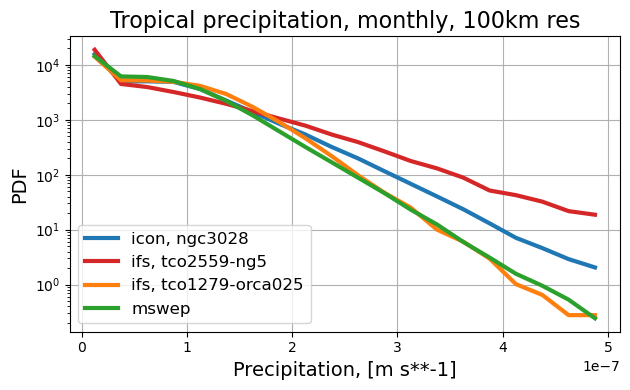

In [13]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=0.8, 
                new_unit="m s**-1",
                legend='icon, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', 
                new_unit="m s**-1",
                legend='ifs, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', 
                new_unit="m s**-1",
                legend='ifs, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', 
                new_unit="m s**-1",
                legend='mswep',
                plot_title='Tropical precipitation, monthly, 100km res', loc='lower left', 
                path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_mpers')

#### Units of precipitation: m  day**-1

2023-07-06 15:46:44 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


{<Axes: title={'center': 'Tropical precipitation, monthly, 100km res'}, xlabel='Precipitation, [m day**-1]', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

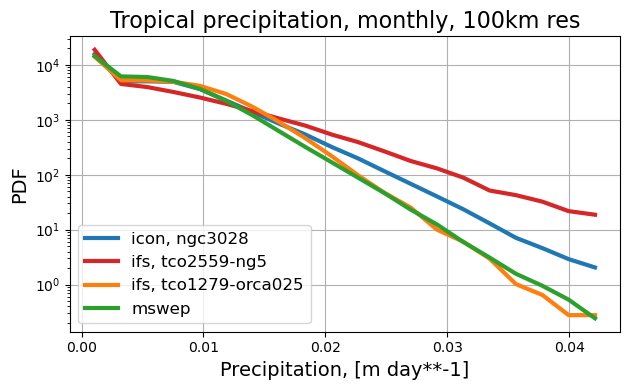

In [14]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=0.8, 
                new_unit="m day**-1",
                legend='icon, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', 
                new_unit="m day**-1",
                legend='ifs, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', 
                new_unit="m day**-1",
                legend='ifs, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', 
                new_unit="m day**-1",
                legend='mswep',
                plot_title='Tropical precipitation, monthly, 100km res', loc='lower left',
                path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_mperday')

## 3. Seasonal and monthly 95 percentage level 

### Calculations of a threshold precipitation value in a different units 

In [13]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

#### By default, the function calculates the 95 percent level with 10% relative error and returns 
 - threshold value of precipitation 
 - units of precipitation 
 - final value of percentage level (including error)

In [14]:
diag.get_95percent_level(icon_ngc3028)

(0.0001875, 'kg m**-2 s**-1', 0.9453451720785118)

Users can set the relative error on a percentage level

In [15]:
diag.get_95percent_level(ifs_tco2559_ng5, original_hist = hist_ifs_tco2559_ng5, rel_error = 0.10)

(0.00024375000000000004, 'kg m**-2 s**-1', 0.9492787519437667)

User can modify the units of the threshold precipitation value

In [16]:
diag.get_95percent_level(ifs_tco1279_orca025, new_unit='m/s')

(2.0078124999999998e-07, 'm/s', 0.947272781986912)

User can also modify the default percentage level 

In [17]:
diag.get_95percent_level(mswep_mon, value=0.9)

(0.00017597656249999997, 'kg m**-2 s**-1', 0.8972933138848432)

### Seasonal Plot of 60 percent level

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  war

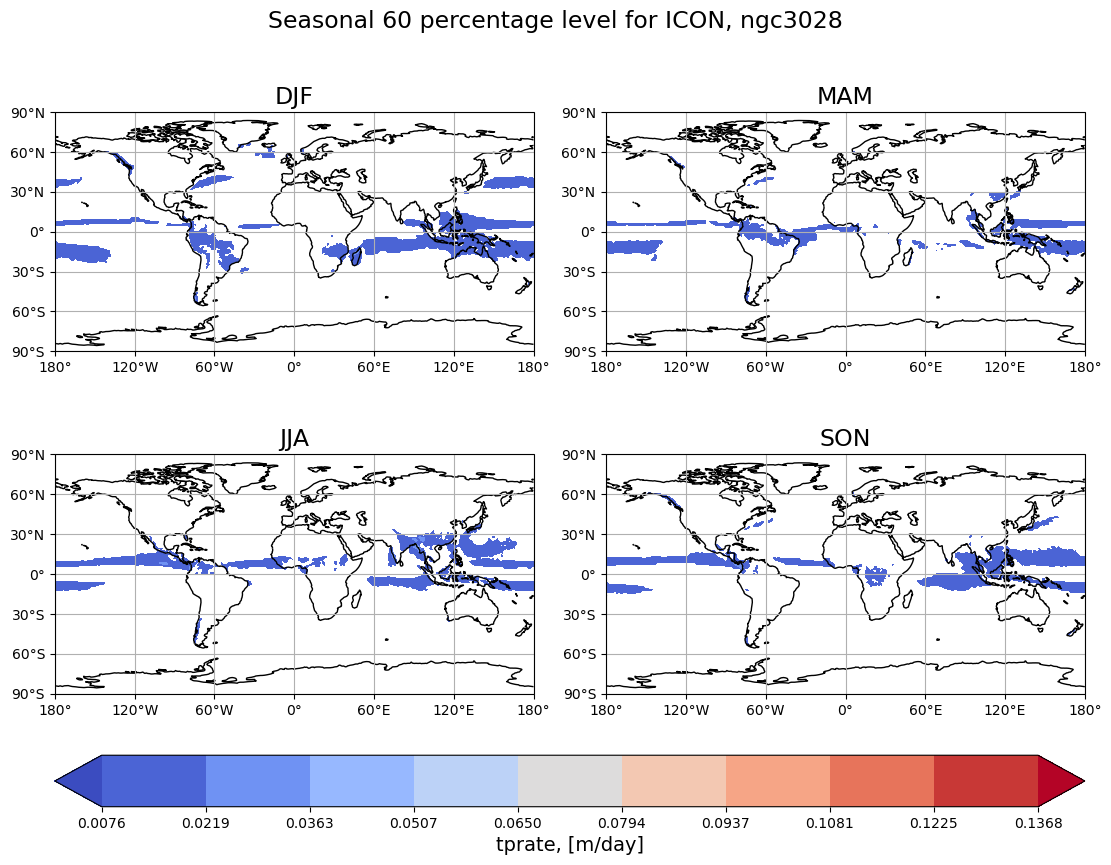

In [5]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)
diag.plot_095level(icon_ngc3028, new_unit='m/day',  trop_lat=90, value=0.6, 
                   plot_title='Seasonal 60 percentage level for ICON, ngc3028',
                   path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_lra_r100_monthly_60percent_level')

### Monthly Plot of 70 percent level

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-06 15:58:45 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


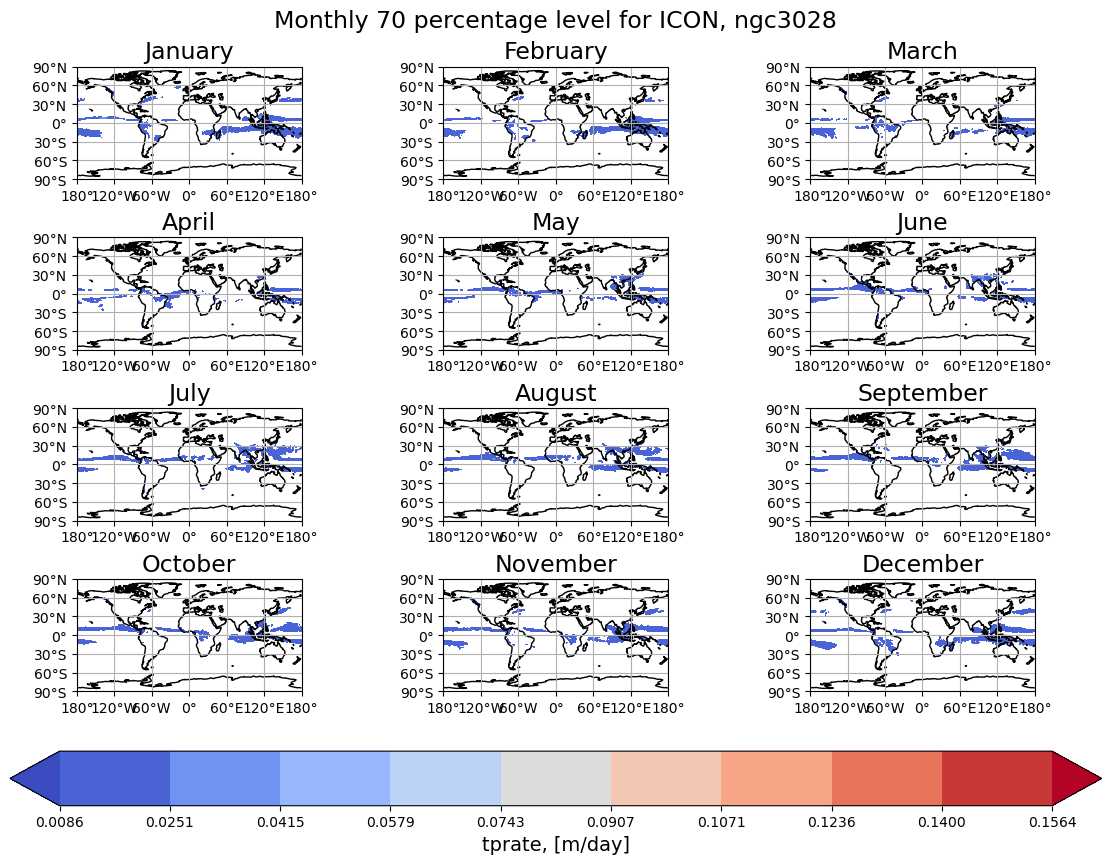

In [6]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)
diag.plot_095level(icon_ngc3028,  seasons=False,  trop_lat=90, new_unit='m/day', value=0.7, 
                    plot_title='Monthly 70 percentage level for ICON, ngc3028',
                    path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_lra_r100_monthly_70percent_level')

### Monthly Plot of 85 percent level

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  war

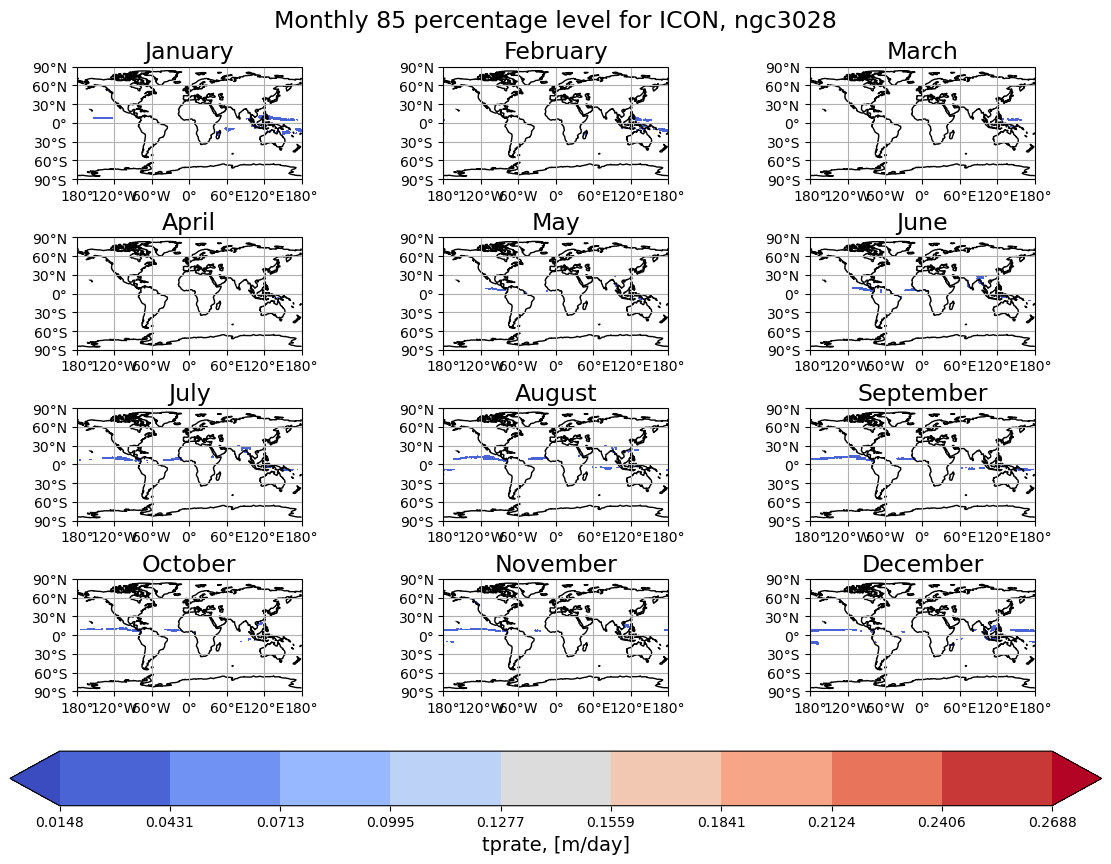

In [7]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)
diag.plot_095level(icon_ngc3028,  seasons=False,  trop_lat=90,  new_unit='m/day', value=0.85,
                    plot_title='Monthly 85 percentage level for ICON, ngc3028',
                    path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_lra_r100_monthly_85percent_level')

## 4. Mean comparison

### 4.1 Along longitude

2023-07-06 16:05:19 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


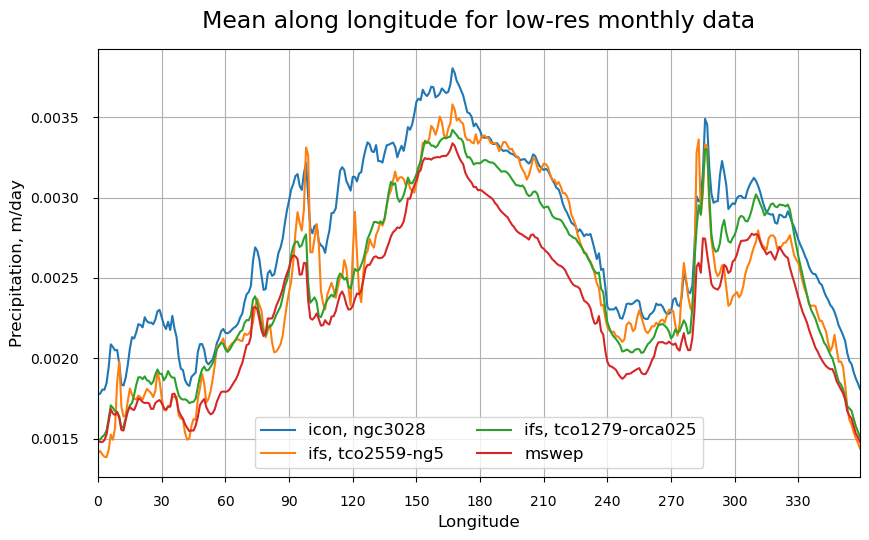

In [17]:
diag.trop_lat = 90
add = diag.mean_and_median_plot(icon_ngc3028,                   coord='lon',  
                                legend='icon, ngc3028',   color='tab:blue', figsize=1.1,    new_unit = 'm/day' )
add = diag.mean_and_median_plot(ifs_tco2559_ng5,             fig=add,    coord='lon',  
                                legend='ifs, tco2559-ng5',    color='tab:orange',           new_unit = 'm/day')

add = diag.mean_and_median_plot(ifs_tco1279_orca025,       fig=add,    coord='lon',  
                                legend='ifs, tco1279-orca025', color='tab:green',           new_unit = 'm/day')

add = diag.mean_and_median_plot(mswep_mon,       fig=add,    coord='lon',  
                                legend='mswep', color='tab:red', loc='lower center',        new_unit = 'm/day',
                                plot_title='Mean along longitude for low-res monthly data',
                                path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lon')

### 4.2 Along latitude

2023-07-06 16:05:41 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


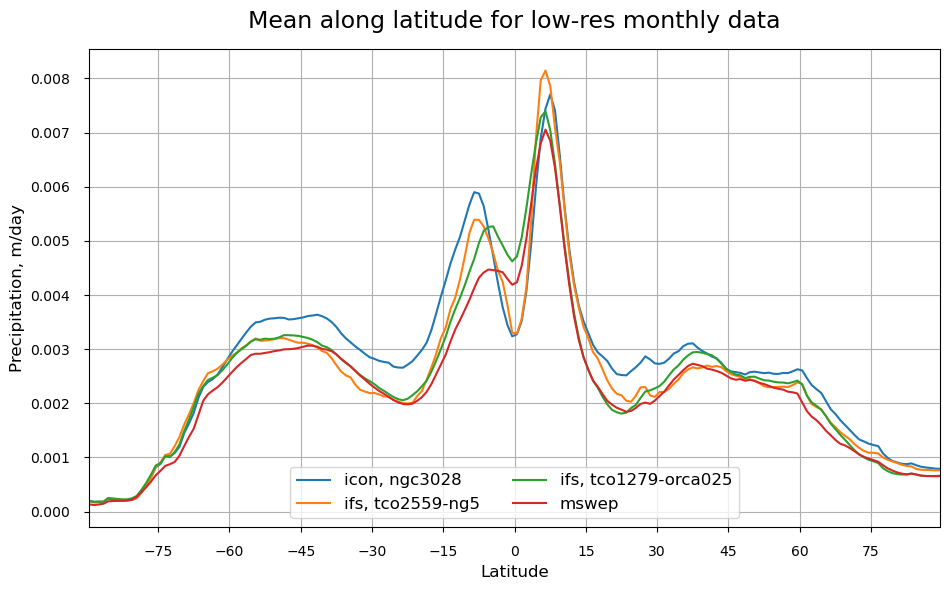

In [18]:
diag.trop_lat = 90
add = diag.mean_and_median_plot(icon_ngc3028,                           coord='lat',  
                                legend='icon, ngc3028',         color='tab:blue',       figsize=1.2, new_unit = 'm/day' )
add = diag.mean_and_median_plot(ifs_tco2559_ng5,            fig=add,    coord='lat',  
                                legend='ifs, tco2559-ng5',      color='tab:orange',     new_unit = 'm/day' )

add = diag.mean_and_median_plot(ifs_tco1279_orca025,        fig=add,    coord='lat',  
                                legend='ifs, tco1279-orca025',  color='tab:green',      new_unit = 'm/day' )

add = diag.mean_and_median_plot(mswep_mon,                  fig=add,    coord='lat',  
                                legend='mswep',                 color='tab:red',        loc='lower center', new_unit = 'm/day', 
                                plot_title='Mean along latitude for low-res monthly data',
                                path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lat')

## 5.. Calculation of a bias 

2023-07-06 16:02:49 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


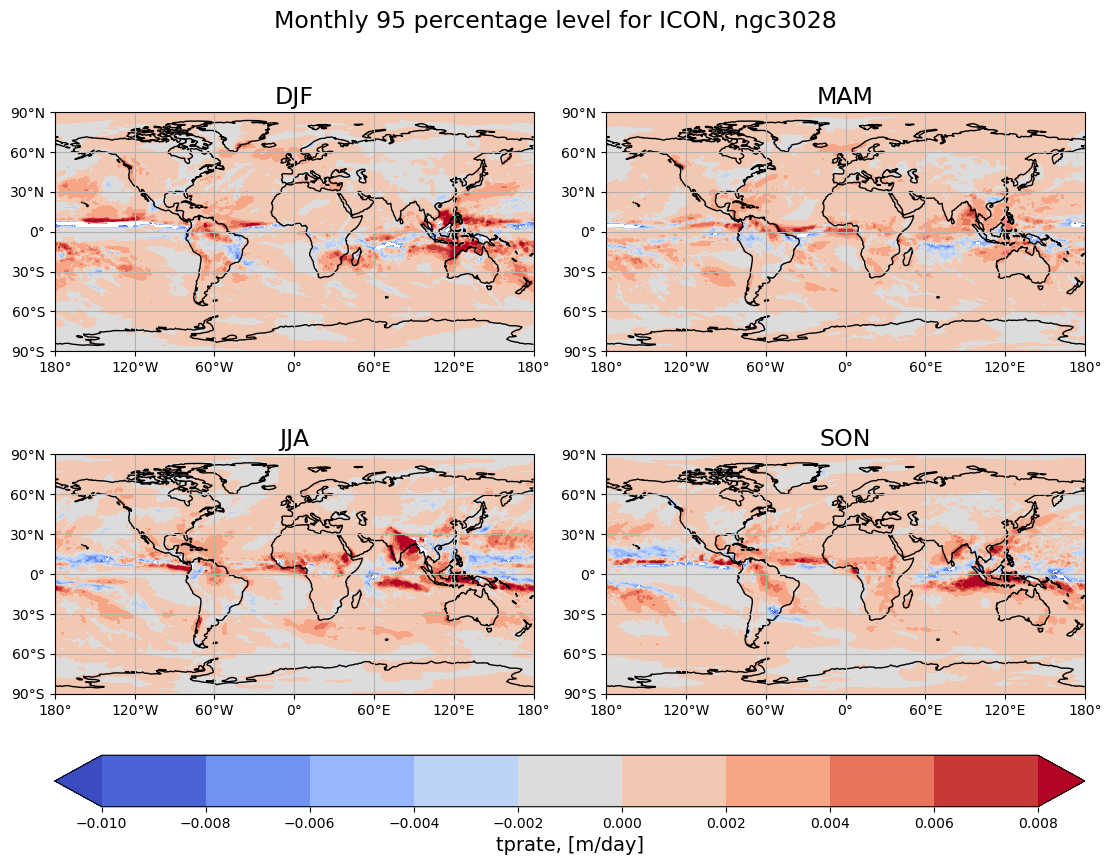

In [11]:
diag.plot_bias(icon_ngc3028, dataset_2 = ifs_tco2559_ng5, seasons=True, new_unit='m/day',  trop_lat=90, vmin=-0.01, vmax=0.01,
                    plot_title='Monthly 95 percentage level for ICON, ngc3028',
                    path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_ifs_tco2559_ng5_lra_r100_monthly_bias')

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
2023-07-06 16:04:01 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


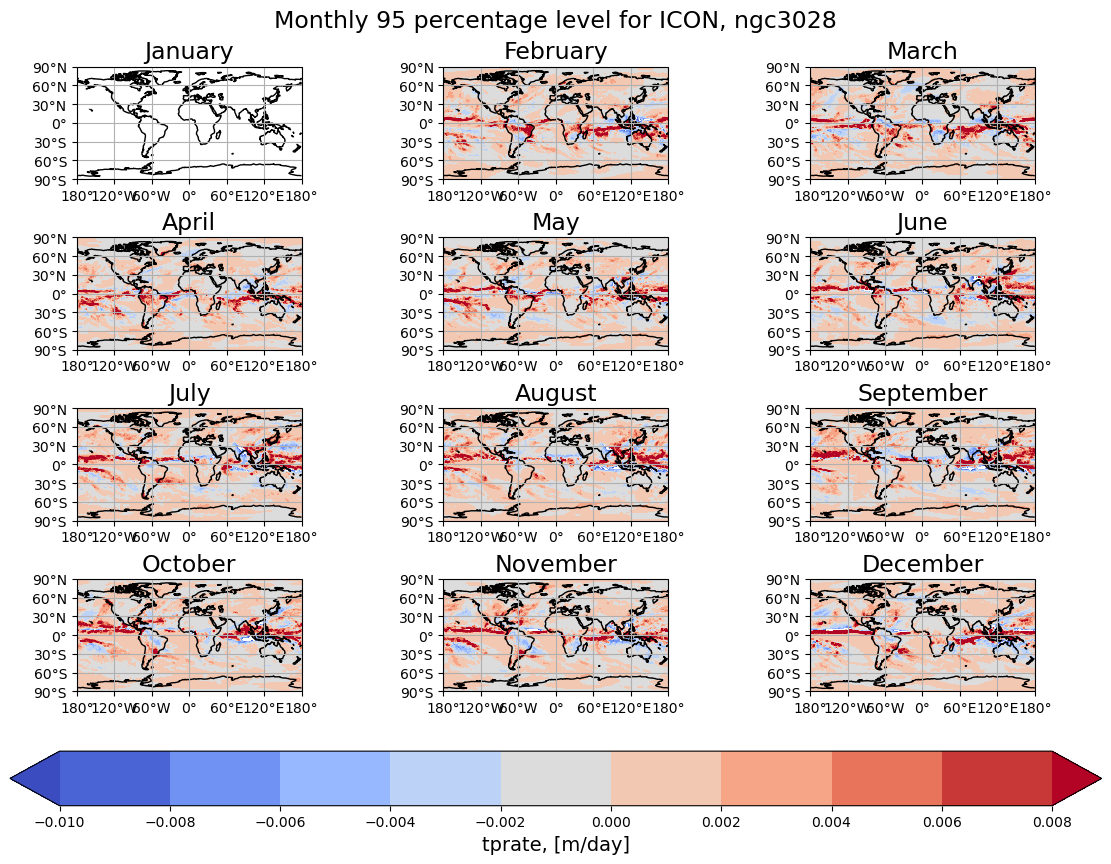

In [12]:
diag.plot_bias(ifs_tco2559_ng5, dataset_2 = icon_ngc3028, seasons=False, new_unit='m/day',  trop_lat=90, vmin=-0.01, vmax=0.01,
                    plot_title='Monthly 95 percentage level for ICON, ngc3028',
                    path_to_pdf=path_to_pdf, name_of_file='ifs_tco2559_ng5_icon_ngc3028_lra_r100_monthly_bias')

#

##### The end